In [36]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import MaxAbsScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression

In [37]:
import warnings
warnings.filterwarnings('ignore')

In [38]:
ah = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory=False)

In [65]:
ah.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond

In [39]:
myVars = ah[['Fireplaces','EnclosedPorch','3SsnPorch','ScreenPorch','Fence',
             'MiscFeature','MiscVal','MSSubClass','LotShape','LotConfig','Street',
             'Alley','Functional','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice']]

In [40]:
features = ah[['Fireplaces','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice','Alley','Fence','ScreenPorch','PoolQC','MSSubClass']]
# features = ah[['Fireplaces']]

In [48]:
dummies = pd.get_dummies(features[['Utilities','Heating','HeatingQC','CentralAir','Electrical','Alley','Fence','PoolQC']],drop_first=True)
# dummies = pd.get_dummies(features[['LotShape']])
features = features.drop(['Utilities','Heating','HeatingQC','CentralAir','Electrical','Alley','SalePrice','Fence','PoolQC'],axis=1)
# features = features.drop(['LotShape'],axis=1)

<h4>Define Variables</h4>

In [49]:
x = pd.concat([features,dummies],axis=1)
y = ah['SalePrice']

<h4>Split Train Test</h4>

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state=100)

In [51]:
mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [52]:
# "Intercept: ", mlr.intercept_
# "Coefficients:"
# list(zip(x, mlr.coef_))

In [53]:
y_pred_mlr =  mlr.predict(x_test)

In [54]:
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
200,182900,230674.945731
167,96000,117575.257072
504,160000,115158.364338
66,615000,285743.328589
346,215000,226626.111653


In [55]:
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 42.25
Mean Absolute Error: 40955.979184589036
Mean Square Error: 3632556779.3921137
Root Mean Square Error: 60270.69585953122


In [56]:
# Results from just 'Fireplaces'
# R squared: 23.81
# Mean Absolute Error: 48224.17785966623
# Mean Square Error: 4723180133.635172
# Root Mean Square Error: 68725.39656950094

In [57]:
# Results from just 'MSSubClass'
# R squared: 24.21
# Mean Absolute Error: 48045.37696035882
# Mean Square Error: 4672289613.9409
# Root Mean Square Error: 68354.14847645239

In [58]:
# Results from: 'Fireplaces','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice','Alley'
# R squared: 40.36
# Mean Absolute Error: 42388.19874049986
# Mean Square Error: 3818851259.0389104
# Root Mean Square Error: 61796.854766556775

In [59]:
# features = ah[['Fireplaces','Utilities','Heating','HeatingQC','CentralAir','Electrical','SalePrice','Alley','Fence','ScreenPorch','PoolQC','MSSubClass']]
# R squared: 42.25
# Mean Absolute Error: 40955.979184589036
# Mean Square Error: 3632556779.3921137
# Root Mean Square Error: 60270.69585953122

<h2>Tree Model Test</h2>

In [60]:
tree_model = tree.DecisionTreeClassifier()

In [61]:
tree_model.fit(features,y)

DecisionTreeClassifier()

In [62]:
tree_model.score(features,y)

0.1182170542635659

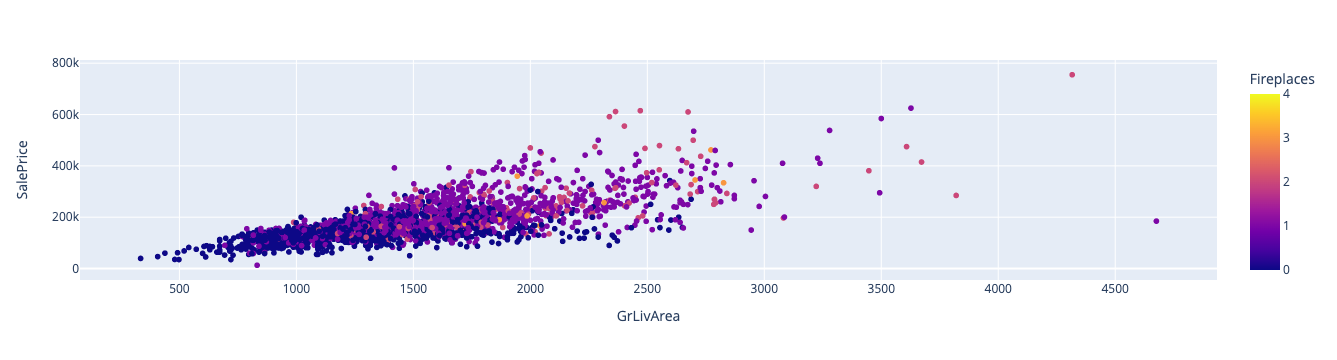

In [67]:
fig = px.scatter(ah,x='GrLivArea', y='SalePrice',color='Fireplaces')
fig.show()

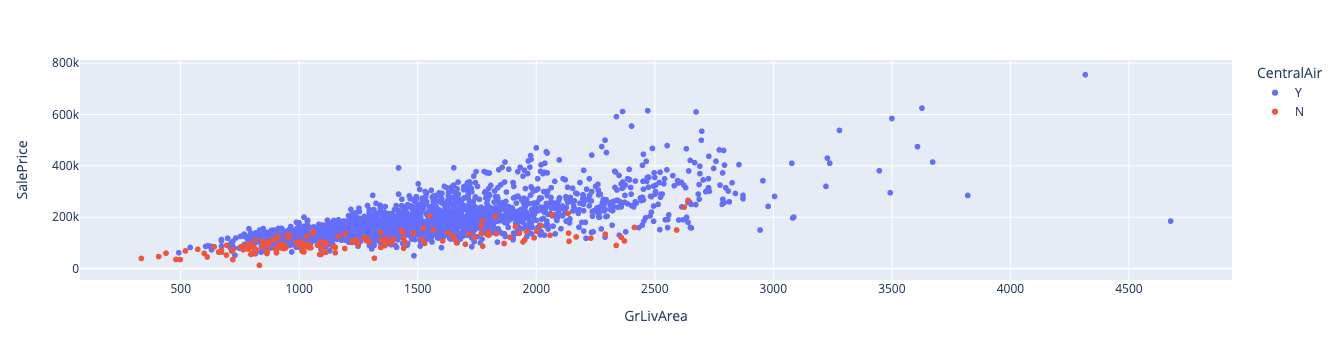

In [68]:
fig = px.scatter(ah,x='GrLivArea', y='SalePrice',color='CentralAir')
fig.show()

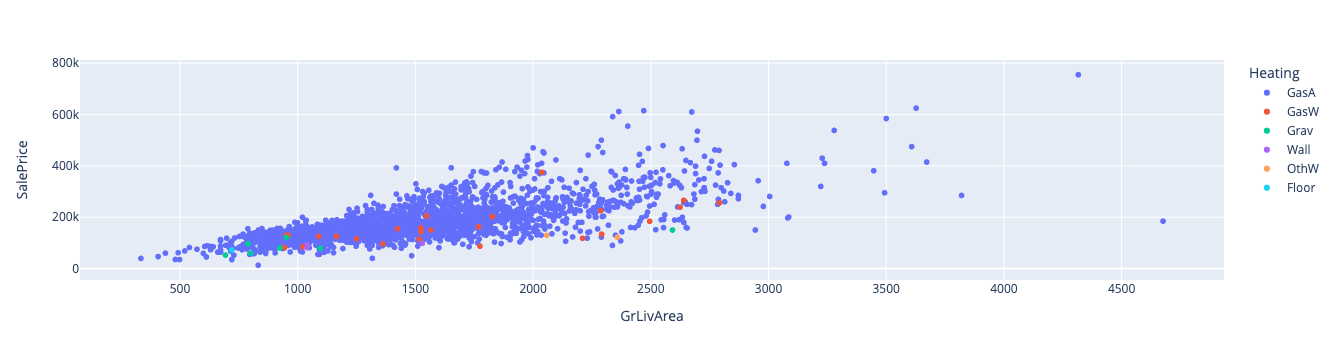

In [70]:
fig = px.scatter(ah,x='GrLivArea', y='SalePrice',color='Heating')
fig.show()